# Tomografía

Dado un sistema cuántico que está en uno de los estados $|\psi_i>$, se define a la matriz de densidad $\rho$ como $\rho=\sum_{i} |\phi_i><\phi_i|$ con ella se pueden describir sistemas cuyo estado no es completamente conocido. 
En el caso de un qubit se cumplen las siguientes relaciones:
\begin{eqnarray}
\rho=\frac{1}{2}(I+\sum_i <\sigma_i>\sigma_i) \\
P_x=Tr[x\rho]
\end{eqnarray}
donde $I$ es la matriz identidad de 2x2, $\sigma_i$ son las matrices de Paulli, $x$ es uno de los posibles estados de la partícula y $P_x$ es la probabilidad de que la partícula se encuentre en el estado $x$. Se debe aclarar que la segunda relación se cumple en general.

Consideremos ahora dos ensambles para nuestro qubit dados por $[\frac{1}{\sqrt2}|0>,\frac{1}{\sqrt2}|1>]$ y $[\frac{1}{\sqrt2}(|0> + |1>)]$ con $|0>$ y $|1>$ eigenestados de $\sigma_z$ con eigenvalores +1 y -1 respectivamente. Si se eligen las siguientes representaciones
$|0>=
\left[{\begin{array}{cc}
1\\ 
0
\end{array}}\right]
$
y
$|1>=
\left[{\begin{array}{cc}
0\\
1
\end{array}}\right]
$
Las matrices de densidad para cada ensamble serán 
$\rho_1=
\left[{\begin{array}{cc}
\frac{1}{2} & 0 \\
0 & \frac{1}{2}
\end{array}}\right]
$
y
$\rho_2=
\left[{\begin{array}{cc}
\frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{2}
\end{array}}\right]
$
respectivamente.

Por otro lado, dadas dos matrices de densidad $\sigma$ y $\rho$ se define la fidelidad como
\begin{equation}
F(\rho,\sigma)=Tr[\sqrt{\sqrt{\rho}\sigma \sqrt{\rho}}]
\end{equation}
En el caso de un qubit la fidelidad puede calcularse mediante
\begin{equation}
F(\rho,\sigma)=\sqrt{Tr(\rho \sigma)+2\sqrt{det(\rho)det(\sigma)}}
\end{equation}
Usando las matrices de densidad mencionadas anteriormente y la expresión para la matriz de densidad en términos de las matrices de Paulli y sus promedios, se construirá una rutina que simule experimentos con el qubit a partir de los cuales será posible determinar los promedios de las matrices de Paulli y con ellos se reconstruirá la matriz de densidad, está ultima será comparada con la orginal (a partir de la que se realizaron los experimentos) y se encontrará la fidelidad.

In [14]:
function qubit(D,n,A) #=Simulará experimentos que medirán en las direcciones x,y,z especificadas en A como 1,2,3 respectivamente, las probabilidades de las mediciones serán dadas por la matriz de densidad D, mientras que n especifica en número de veces que se realizará la medición en la dirección dada.=#
    x=[1;0]
    y=[0;1] #=Son eigenvectores de sigma z y nos servirán para definir los estados en las otras direcciones y así a partir de la matriz de densidad encontrar las probabilidades.=#
    if A == 3
        P=x*x'
    elseif A == 1
        k=(1/sqrt(2))*(x+y)
        P=k*k'
    elseif A==2 
        k=(1/sqrt(2))*(x+1im*y)
        P=k*k'
    end #=En las lineas anteriores se está considerando sólo el estado "positivo" de cada dirección, debido a que basta conocer la probabilidad de éste para inferir la parte "negativa" y por ende conocer los resultados de los experimentos=#
    h=P*D
    q=0
    for i in 1:2
        q=q+h[i,i]
    end #=En el ciclo anterior se calcula la probabilidad de obtener el estado "positivo" de la dirección seleccionada, es decir la traza del producto de la matriz, que representa a dicho estado, con la matriz de densidad=#
    list=zeros(n)
    for i in 1:n
    l=rand() 
    if l<=abs(q)
        list[i]=1
    else
            list[i]=-1
    end #=Aquí se realiza el experimento que consiste en generar un número aleatorio entre 0 y 1, que es comparado con la probabilidad de medir el estado "positivo" en la dirección seleccionada. Si el número es mayor que la probabilidad mencionada se considera que el resultado del experimento es que el sistema estaba en el estado "negativo" mientras que si el número es menor que la probabilidad el sistema se encontraba en el estado "positivo".=#
    end
    return list #=El experimento se realiza n-veces y se obtiene una lista que contiene {1,-1} dependiendo de si el sistema se encontraba en el estado "positivo" o "negativo" de la dirección elegida respectivamente.=#
end;

## A continuación se muestran los resultados de una serie de experimentos que miden 100 veces en cada eje usando $\rho_1$ y $\rho_2$ para calcular las probabilidades.

In [2]:
D=[1/2 1/2; 1/2 1/2]
H=[1/2 0; 0 1/2]; #= H es rho 1 y D es rho 2=#

In [13]:
using PyPlot;

### Resultados de los experimentos para $\rho_2$

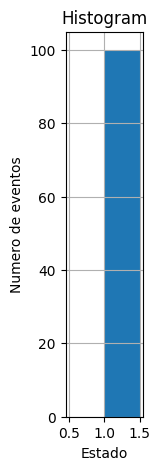

In [42]:
s=qubit(D,100,1)
nbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](s,nbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

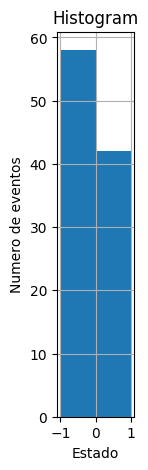

In [43]:
t=qubit(D,100,2)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

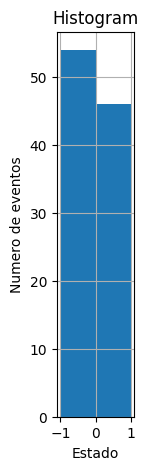

In [44]:
t=qubit(D,100,3)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

### Resultados de los experimentos para $\rho_1$

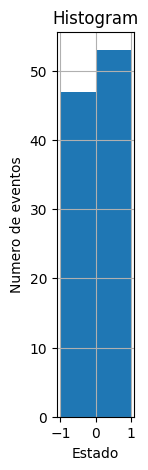

In [45]:
t=qubit(H,100,1)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

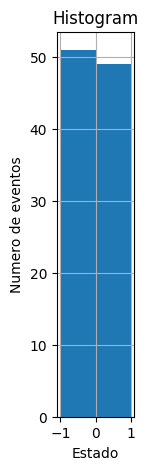

In [46]:
t=qubit(H,100,2)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

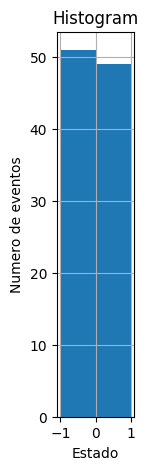

In [47]:
t=qubit(H,100,3)
sbins = 2 
fig = figure("pyplot_histogram",figsize=(1,5)) 
ax = axes() 
h = plt[:hist](t,sbins) 
grid("on")
xlabel("Estado")
ylabel("Numero de eventos")
title("Histogram");

Como puede apreciarse los resultados de los experimentos son muy similares para ambas matrices de densidad en los ejes $[y,z]$ dando un 50% para el estado "positivo" y "negativo", mientras que en el eje $x$  $\rho_2$ arroja una probabilidad de 1 para la medición del estado "positivo" y $\rho_1$ da $\frac{1}{2}$.

Por último se construirá una rutina que reconstruya la matriz de densidad empleando la rutina anterior y otra que calcule la fidelidad de ambas matrices (la original y la construida a partir de los experimentos), por último se harán gráficas de la fidelidad contra el número de experimentos para varias matrices de densidad.

In [8]:
function Promedio(x) #=Esta rutina calcula el promedio dada una lista de números=#
    n=length(x)
    r=0
    for i in 1:n
        r=r+x[i]
    end
    r=r/n
    return r
end;

In [9]:
function Reconstruccion(D,n) #=En esta rutina se reconstruye la matriz de densidad a partir de n-experimentos determinados por la matriz de densidad original=#
    listx=qubit(D,n,1)
    listy=qubit(D,n,2)
    listz=qubit(D,n,3)
    x=Promedio(listx)
    y=Promedio(listy)
    z=Promedio(listz)
    A=(1/2)*([1 0;0 1]+x*[0 1;1 0]+y*[0 -1im;1im 0]+z*[1 0;0 -1])
    return A
    end;

In [10]:
function Fidelidad(D,n) #=Esta rutina construye una matriz de densidad luego de n-experimentos determinados por una matriz de densidad (original) y luego calcula la fidelidad entre ambas=#
    A=Reconstruccion(D,n)
    s=det(A)
    h=det(D)
    H=D*A
    l=0
    for i in 1:2
        l=l+H[i,i]
    end
    f=sqrt(l+2*sqrt(s*h))
    return abs(f)
end;        

In [29]:
D=[1/2 1/2; 1/2 1/2]
H=[1/2 0; 0 1/2] #= H es rho 1 y D es rho 2=#
F=[1/3 2/3;0 1/2]
E=[1/4 0;3/4 1/3]
G=[1/5 1/3;0 1/2];

## A continuación se muestran las graficas de fidelidad Vs número de experimentos para distintas matrices de densidad

### Fidelidad VS número de experimentos para D ($\rho_2$)

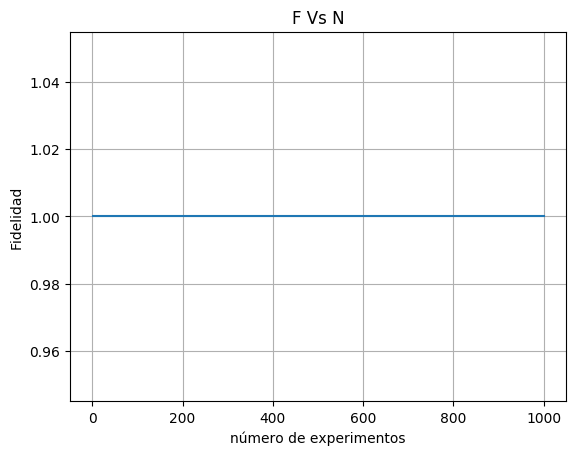

In [40]:
n=linspace(1,1000,1000)
y=zeros(1000)
for i in 1:1000
    y[i]=Fidelidad(D,i)
end
xlabel("número de experimentos")
ylabel("Fidelidad")
title("F Vs N")
grid("on")
plot(n,y);

### Fidelidad Vs número de experimentos para H($\rho_1$)

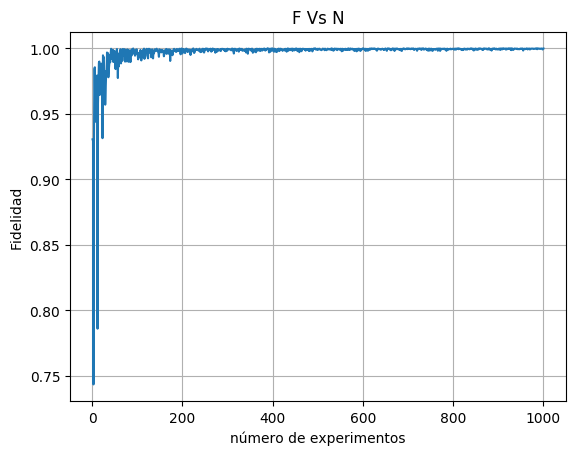

In [29]:
n=linspace(1,1000,1000)
y=zeros(1000)
for i in 1:1000
    y[i]=Fidelidad(H,i)
end
xlabel("número de experimentos")
ylabel("Fidelidad")
title("F Vs N")
grid("on")
plot(n,y);

### Fidelidad Vs número de experimentos para F

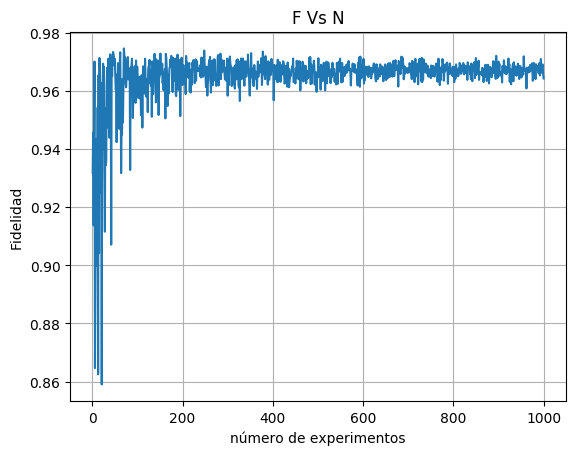

In [35]:
n=linspace(1,1000,1000)
y=zeros(1000)
for i in 1:1000
    y[i]=Fidelidad(F,i)
end
xlabel("número de experimentos")
ylabel("Fidelidad")
title("F Vs N")
grid("on")
plot(n,y);

### Fidelidad Vs número de experimentos para E

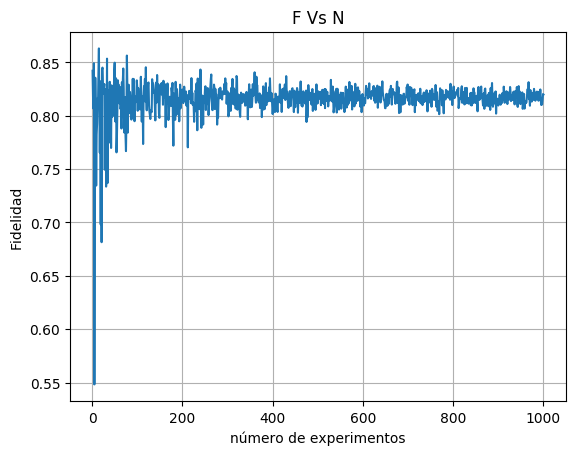

In [17]:
n=linspace(1,1000,1000)
y=zeros(1000)
for i in 1:1000
    y[i]=Fidelidad(E,i)
end
xlabel("número de experimentos")
ylabel("Fidelidad")
title("F Vs N")
grid("on")
plot(n,y);

### Fidelidad Vs número de experimentos para G

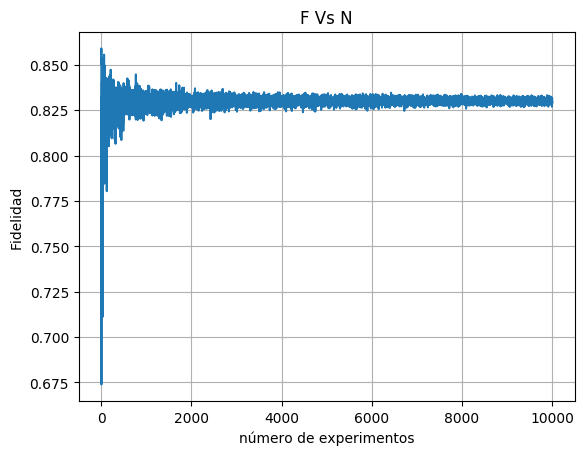

In [30]:
n=linspace(1,10000,10000)
y=zeros(10000)
for i in 1:10000
    y[i]=Fidelidad(G,i)
end
xlabel("número de experimentos")
ylabel("Fidelidad")
title("F Vs N")
grid("on")
plot(n,y);

Como puede observarse, para todas las matrices la fidelidad aumenta a medida que se realizan más experimentos, es decir, se reconstruye mejor el estado mientras más información experimental se tenga. Por otro lado parece haber un problema con $\rho_2$ puesto que la fidelidad es constante y siempre igual a 1 por lo que daré una explicación a este resultado.

Primero supongamos que hemos realizado un número n de experimentos y hemos obtenido los promedios de las sigmas $<\sigma_x>=1$, $<\sigma_y>=n_y$ y $<\sigma_z>=n_z$ (en este caso $<\sigma_x>=1$ porque la probabilidad de obtener el estado "positivo" en el eje $x$ es 1 para $\rho_2$) entonces la matriz reconstruida a partir de estos promedios sería
$A=
\left[{\begin{array}{cc}
\frac{1}{2}(1+n_z) & \frac{1}{2}(1-in_y) \\
\frac{1}{2}(1+in_y) & \frac{1}{2}(1-n_z)
\end{array}}\right]
$,
si ahora consideramos la definición de fidelidad $F(\rho,A)=\sqrt{Tr(\rho A)+2\sqrt{det(\rho)det(A)}}$ es fácil ver que $det(\rho_2)=0$ entonces el término que determina la fidelidad es $Tr(\rho A)$. Calculando este término se obtiene:
$\rho A=
\left[{\begin{array}{cc}
\frac{1}{4}(2+n_z+in_y) & \frac{1}{4}(1-in_y-n_z) \\
\frac{1}{4}(1+n_z+in_y) & \frac{1}{4}(1--in_y-n_z)
\end{array}}\right]
$
lo que implica $Tr(\rho A)=1$ y $F(\rho,A)=1$ independientemente de los promedios de las sigmas. Además, si consideramos los resultados de los experimentos que se hicieron con $\rho_2$ es posible notar que $<\sigma_y>\to0$ y $<\sigma_z>\to0$ a medida que $n\to \infty$ por lo que al sustituir esto en la expresión de $A$ se obtiene que $A=\rho_2$, lo que coincide con la grafica mostrada anteriormente.